# Predicting National Park Visitation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pytrends
from pytrends.request import TrendReq
import seaborn as sns
import numpy as np


In [2]:
#NP EDA
import calendar 
np_df = pd.read_csv('NPS_with_trends.csv', index_col = 0)

np_df['MonthName'] = np_df['Month'].apply(lambda x: calendar.month_abbr[x])
np_df

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,...,NonRecreationHoursTotal,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal,Google_Searches,MonthName
0,Acadia National Park,ACAD,National Park,Northeast,ME,2005,1,10810,600,71346,...,47100,0,0,85815,19302,1157,0,5378,30,Jan
1,Acadia National Park,ACAD,National Park,Northeast,ME,2005,2,11831,600,78086,...,47100,0,0,85815,19302,1157,0,5378,30,Feb
2,Acadia National Park,ACAD,National Park,Northeast,ME,2005,3,18917,600,124854,...,47100,0,0,85815,19302,1157,0,5378,28,Mar
3,Acadia National Park,ACAD,National Park,Northeast,ME,2005,4,59773,600,346683,...,47100,0,0,85815,19302,1157,0,5378,44,Apr
4,Acadia National Park,ACAD,National Park,Northeast,ME,2005,5,110330,7500,628052,...,47100,0,0,85815,19302,1157,0,5378,58,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12834,Zion National Park,ZION,National Park,Intermountain,UT,2021,8,466928,1860,3105093,...,5475,55454,0,138730,89919,15071,0,7969,54,Aug
12835,Zion National Park,ZION,National Park,Intermountain,UT,2021,9,483180,1800,3076210,...,5475,55454,0,138730,89919,15071,0,7969,58,Sep
12836,Zion National Park,ZION,National Park,Intermountain,UT,2021,10,469379,1860,2902495,...,5475,55454,0,138730,89919,15071,0,7969,51,Oct
12837,Zion National Park,ZION,National Park,Intermountain,UT,2021,11,308560,1800,1932994,...,5475,55454,0,138730,89919,15071,0,7969,44,Nov


In [3]:
parks = list(np_df['ParkName'].unique())
parks

['Acadia National Park',
 'Arches National Park',
 'Badlands National Park',
 'Big Bend National Park',
 'Biscayne National Park',
 'Black Canyon of the Gunnison National Park',
 'Bryce Canyon National Park',
 'Canyonlands National Park',
 'Capitol Reef National Park',
 'Carlsbad Caverns National Park',
 'Channel Islands National Park',
 'Congaree National Park',
 'Crater Lake National Park',
 'Cuyahoga Valley National Park',
 'Death Valley National Park',
 'Denali National Park',
 'Dry Tortugas National Park',
 'Everglades National Park',
 'Gates of the Arctic National Park',
 'Gateway Arch National Park',
 'Glacier Bay National Park',
 'Glacier National Park',
 'Grand Canyon National Park',
 'Grand Teton National Park',
 'Great Basin National Park',
 'Great Sand Dunes National Park',
 'Great Smoky Mountains National Park',
 'Guadalupe Mountains National Park',
 'Haleakala National Park',
 'Hawaii Volcanoes National Park',
 'Hot Springs National Park',
 'Indiana Dunes National Park',


### Time Series Regression

In [4]:
np_df['date'] = pd.to_datetime((np_df.Year*10000+np_df.Month*100+1).apply(str),format='%Y%m%d')
np_df

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,...,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal,Google_Searches,MonthName,date
0,Acadia National Park,ACAD,National Park,Northeast,ME,2005,1,10810,600,71346,...,0,0,85815,19302,1157,0,5378,30,Jan,2005-01-01
1,Acadia National Park,ACAD,National Park,Northeast,ME,2005,2,11831,600,78086,...,0,0,85815,19302,1157,0,5378,30,Feb,2005-02-01
2,Acadia National Park,ACAD,National Park,Northeast,ME,2005,3,18917,600,124854,...,0,0,85815,19302,1157,0,5378,28,Mar,2005-03-01
3,Acadia National Park,ACAD,National Park,Northeast,ME,2005,4,59773,600,346683,...,0,0,85815,19302,1157,0,5378,44,Apr,2005-04-01
4,Acadia National Park,ACAD,National Park,Northeast,ME,2005,5,110330,7500,628052,...,0,0,85815,19302,1157,0,5378,58,May,2005-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12834,Zion National Park,ZION,National Park,Intermountain,UT,2021,8,466928,1860,3105093,...,55454,0,138730,89919,15071,0,7969,54,Aug,2021-08-01
12835,Zion National Park,ZION,National Park,Intermountain,UT,2021,9,483180,1800,3076210,...,55454,0,138730,89919,15071,0,7969,58,Sep,2021-09-01
12836,Zion National Park,ZION,National Park,Intermountain,UT,2021,10,469379,1860,2902495,...,55454,0,138730,89919,15071,0,7969,51,Oct,2021-10-01
12837,Zion National Park,ZION,National Park,Intermountain,UT,2021,11,308560,1800,1932994,...,55454,0,138730,89919,15071,0,7969,44,Nov,2021-11-01


In [5]:
import sklearn
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

### SARIMAX 

Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors

https://medium.com/analytics-vidhya/time-series-forecasting-and-analysis-arima-and-seasonal-arima-cacaf61ae863 

In [6]:
np_df.ParkName.unique()

array(['Acadia National Park', 'Arches National Park',
       'Badlands National Park', 'Big Bend National Park',
       'Biscayne National Park',
       'Black Canyon of the Gunnison National Park',
       'Bryce Canyon National Park', 'Canyonlands National Park',
       'Capitol Reef National Park', 'Carlsbad Caverns National Park',
       'Channel Islands National Park', 'Congaree National Park',
       'Crater Lake National Park', 'Cuyahoga Valley National Park',
       'Death Valley National Park', 'Denali National Park',
       'Dry Tortugas National Park', 'Everglades National Park',
       'Gates of the Arctic National Park', 'Gateway Arch National Park',
       'Glacier Bay National Park', 'Glacier National Park',
       'Grand Canyon National Park', 'Grand Teton National Park',
       'Great Basin National Park', 'Great Sand Dunes National Park',
       'Great Smoky Mountains National Park',
       'Guadalupe Mountains National Park', 'Haleakala National Park',
       'Hawaii

In [7]:
park_name = 'Arches National Park'
park_df = np_df[np_df['ParkName'] == park_name][['date','Month', 'Year','RecreationVisits','Google_Searches']]

In [8]:

park_df.index = park_df.date
park_df_arima = park_df[['RecreationVisits']]
park_df_arima

,RecreationVisits
date,
2005-01-01,9894
2005-02-01,16168
2005-03-01,62843
2005-04-01,71709
2005-05-01,111718
...,...
2021-08-01,167686
2021-09-01,193002
2021-10-01,169983


#### Visualize underlying patterns in the data

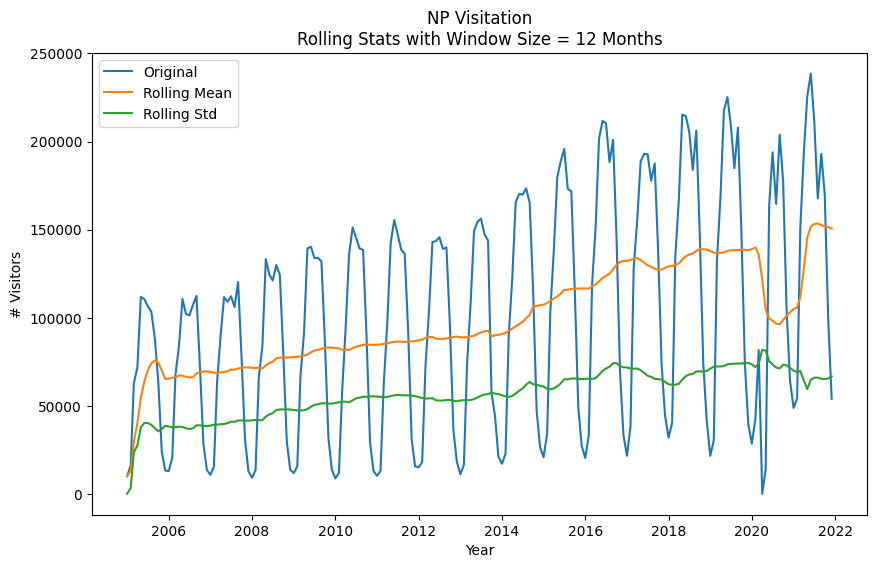

In [9]:
def calc_rolling_stats(ser, wd_size=7):
    """
    Takes in a series and returns the rolling mean and the rolling std for a window of size wd_size
    """
    df = pd.DataFrame(ser).reset_index()
    df = df.rename(columns = {df.columns[0]:'date', df.columns[1]:'cases'})

    df['means'] = df['cases'].rolling(wd_size).apply(np.mean)
    for i in range(1,wd_size):
        days_cases = np.flip(ser.values[:i])
        df.loc[i-1, ['means']]= np.mean(days_cases)
    rolling_mean = df['means'].values

    df['std'] = df['cases'].rolling(wd_size).apply(np.std)
    for i in range(1,wd_size):
        days_cases = np.flip(ser.values[:i])
        df.loc[i-1, ['std']]= np.std(days_cases)
    rolling_std = df['std'].values
    return rolling_mean, rolling_std

ser = park_df_arima['RecreationVisits']

rolling_mean, rolling_std = calc_rolling_stats(ser, wd_size = 12)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ser, label="Original")
ax.plot(pd.Series(rolling_mean, index=ser.index), label="Rolling Mean")
ax.plot(pd.Series(rolling_std, index=ser.index), label="Rolling Std")

ax.set_xlabel("Year")
ax.set_ylabel("# Visitors")
ax.set_title("NP Visitation\n" + f"Rolling Stats with Window Size = 12 Months")
ax.legend()

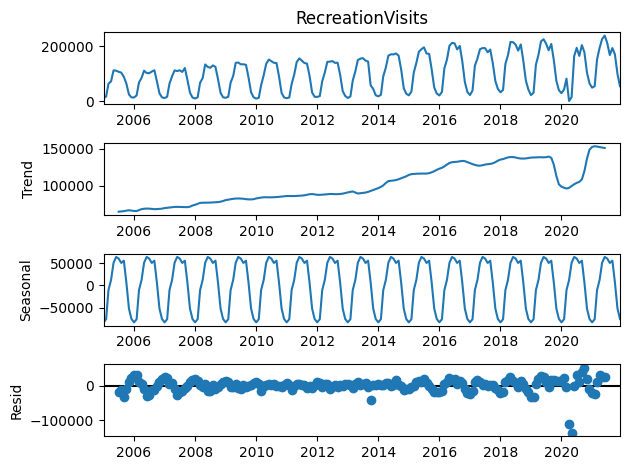

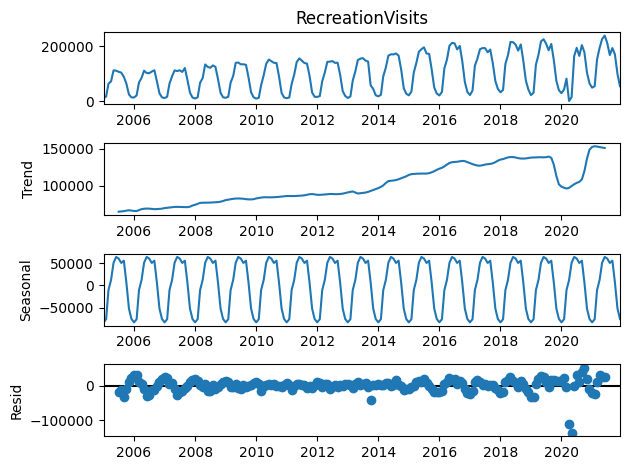

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_data = seasonal_decompose(park_df_arima['RecreationVisits'])
decomp_data.plot()

Clear yearly seasonal pattern. Valley at end of one year, start of the next year, peak during the middle of the year. 
Note: Can also do augmented Dickey-Fuller test to check if stationary (if p-value < 0.05, the data is stationary)

In [11]:
#park_df_arima['diffs'] = park_df_arima['RecreationVisits'] - park_df_arima['RecreationVisits'].shift(12)
#park_df_arima = park_df_arima.dropna()
#park_df_arima

In [12]:
#park_df_arima['logs'] = np.log(park_df_arima['RecreationVisits'])
#park_df_arima = park_df_arima.dropna()
#park_df_arima['diffs'] = np.diff(park_df_arima['logs'], prepend = park_df_arima['logs'][0])

#park_df_arima['diffs'] = park_df_arima['logs'].diff()
#park_df_arima = park_df_arima.dropna()

#ser = park_df_arima['diffs']

#rolling_mean, rolling_std = calc_rolling_stats(ser, wd_size = 12)

#### Checking autocorrelation (corr between original data and lagged data)

In [13]:
#from statsmodels.graphics.tsaplots import plot_pacf

#fig, ax = plt.subplots(1, 1, figsize=(8, 6))

#plot_pacf(park_df_arima['diffs'], ax, lags=50, title="National Park Visitation\nAutocorrelation Function")
#ax.set_xlabel("Lag")
#ax.set_ylabel("Correlation")


Infor on SARIMAX: https://365datascience.com/tutorials/python-tutorials/sarimax/ 

/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_mod

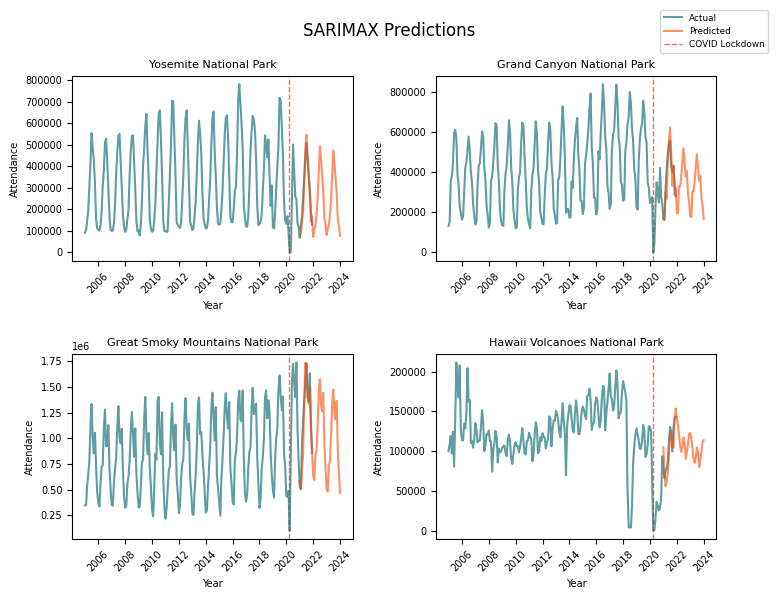

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime
# seasonal_order = (Seasonal AR specification, Seasonal Integration order, Seasonal MA, Seasonal periodicity) 
# cycle length = 12 months

parks = ['Yosemite National Park', 'Grand Canyon National Park', 'Great Smoky Mountains National Park', 'Hawaii Volcanoes National Park']
#park_name = 'Arches National Park'
def getTimeSeries(park_name):
    park_df = np_df[np_df['ParkName'] == park_name][['date','Month', 'Year','RecreationVisits','Google_Searches']]

    park_df.index = park_df.date
    park_df_arima = park_df[['RecreationVisits']]

    model = SARIMAX(park_df_arima['RecreationVisits'], order = (1,0,1),
                                    seasonal_order = (1,0,1,12))
    results = model.fit(disp=0)

    # dynamic = True: out-of-sample prediction, = False: in-sample prediction
    forecasts = results.predict(start = len(park_df_arima)-12, end = len(park_df_arima) + 24, dynamic = False)

    from sklearn import metrics
    from sklearn.metrics import mean_absolute_error
    preds = results.predict(start = 0, end = len(park_df_arima)-1, dynamic = False)

    # in-sample makes better preds
    rmse = np.sqrt(metrics.mean_squared_error(park_df_arima['RecreationVisits'], preds))
    
    return (park_df_arima, forecasts, round(rmse, 3))

#fig, ax = plt.subplots(2,2)

#ax[0,0].plot(park_df_arima.index,park_df_arima['RecreationVisits'], c = 'cadetblue')
#ax[0,0].plot(forecasts.index,forecasts.values, c = 'orangered', alpha = 0.6)
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (8,6))
#for park, ax in zip(parks, axs.ravel()):
#    getTimeSeries(park).plot(ax = ax)

axs[0,0].plot(getTimeSeries(parks[0])[0].index,getTimeSeries(parks[0])[0]['RecreationVisits'], c = 'cadetblue')
axs[0,0].plot(getTimeSeries(parks[0])[1].index, getTimeSeries(parks[0])[1].values, c = 'orangered', alpha = 0.6)
axs[0,0].set_title('{}'.format(parks[0]), size = 8)
axs[0,0].set_xlabel('Year',fontsize = 7) 
axs[0,0].set_ylabel('Attendance', fontsize = 7)
axs[0,0].tick_params(axis='both', labelsize=7)
axs[0,0].tick_params(axis='x', rotation = 45)
axs[0,0].axvline(x=datetime.datetime(2020,3,15), c = 'red', label = 'COVID Lockdown', ls = '--', alpha = 0.6).set_linewidth(1)


axs[0,1].plot(getTimeSeries(parks[1])[0].index,getTimeSeries(parks[1])[0]['RecreationVisits'], c = 'cadetblue')
axs[0,1].plot(getTimeSeries(parks[1])[1].index, getTimeSeries(parks[1])[1].values, c = 'orangered', alpha = 0.6)
axs[0,1].set_title('{}'.format(parks[1]), size = 8)
axs[0,1].set_xlabel('Year' , fontsize = 7) 
axs[0,1].set_ylabel('Attendance', fontsize = 7)
axs[0,1].tick_params(axis='both', labelsize=7)
axs[0,1].tick_params(axis='x', rotation = 45)
axs[0,1].axvline(x=datetime.datetime(2020,3,15), c = 'red', label = 'COVID Lockdown', alpha = 0.6, ls = '--').set_linewidth(1)
axs[0,1].legend(['Actual', 'Predicted', 'COVID Lockdown'], loc=1, prop={'size': 6.4}, bbox_to_anchor=(1.2, 1.38))

axs[1,0].plot(getTimeSeries(parks[2])[0].index,getTimeSeries(parks[2])[0]['RecreationVisits'], c = 'cadetblue')
axs[1,0].plot(getTimeSeries(parks[2])[1].index, getTimeSeries(parks[2])[1].values, c = 'orangered', alpha = 0.6)
axs[1,0].set_title('{}'.format(parks[2]), size = 8)
axs[1,0].set_xlabel('Year', fontsize = 7) 
axs[1,0].set_ylabel('Attendance', fontsize = 7)
axs[1,0].tick_params(axis='both', labelsize=7)
axs[1,0].tick_params(axis='x', rotation = 45)
axs[1,0].yaxis.get_offset_text().set_fontsize(7)
axs[1,0].axvline(x=datetime.datetime(2020,3,15), c = 'red', label = 'COVID Lockdown', alpha = 0.6, ls = '--').set_linewidth(1)

axs[1,1].plot(getTimeSeries(parks[3])[0].index,getTimeSeries(parks[3])[0]['RecreationVisits'], c = 'cadetblue')
axs[1,1].plot(getTimeSeries(parks[3])[1].index, getTimeSeries(parks[3])[1].values, c = 'orangered', alpha = 0.6)
axs[1,1].set_title('{}'.format(parks[3]), size = 8)
axs[1,1].set_xlabel('Year',fontsize = 7) 
axs[1,1].set_ylabel('Attendance',fontsize = 7)
axs[1,1].tick_params(axis='both', labelsize=7)
axs[1,1].tick_params(axis='x', rotation = 45)
axs[1,1].axvline(x=datetime.datetime(2020,3,15), c = 'red', label = 'COVID Lockdown', alpha = 0.6, ls = '--').set_linewidth(1)

fig.tight_layout(pad=1.5)
plt.suptitle('SARIMAX Predictions')
fig.subplots_adjust(top=0.89)
#fig.title('SARIMAX Predictions for Four National Parks')
plt.savefig('sarimax.jpg')

In [35]:
rmses =[]
for p in parks:
    r = getTimeSeries(p)[2]
    rmses.append(r)
rmses

/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_mod

[53290.808, 59738.817, 132248.397, 22332.004]

In [36]:
rmse_df = pd.DataFrame()
rmse_df['Park'] = parks
rmse_df['RMSE'] = rmses
rmse_df['Attendance (2021)'] = 
rmse_df

,Park,RMSE
0,Yosemite National Park,53290.808
1,Grand Canyon National Park,59738.817
2,Great Smoky Mountains National Park,132248.397
3,Hawaii Volcanoes National Park,22332.004


/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.23120D+01    |proj g|=  1.81490D+01

At iterate    5    f=  1.21028D+01    |proj g|=  2.55937D-01

At iterate   10    f=  1.18547D+01    |proj g|=  1.22473D-02

At iterate   15    f=  1.18180D+01    |proj g|=  3.80254D-03
  ys=-3.826E-06  -gs= 2.728E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     95      3     1     0   2.906D-01   1.157D+01
  F =   11.565523595830392     

ABNORMAL_TERMINAT


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'Actual & Predicted Arches National Park Attendance')

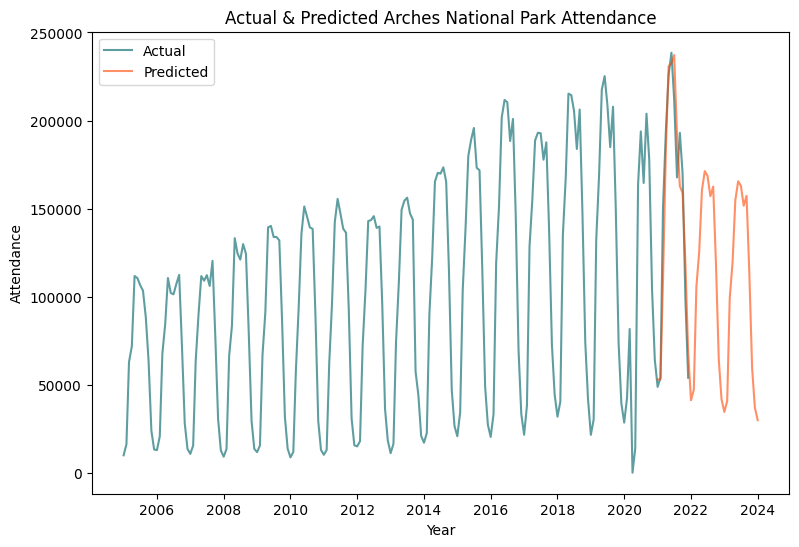

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# seasonal_order = (Seasonal AR specification, Seasonal Integration order, Seasonal MA, Seasonal periodicity) 
# cycle length = 12 months



model = SARIMAX(park_df_arima['RecreationVisits'], order = (1,0,1),
                                 seasonal_order = (1,0,1,12))
results = model.fit()

# dynamic = True: out-of-sample prediction, = False: in-sample prediction
forecasts = results.predict(start = len(park_df_arima)-12, end = len(park_df_arima) + 24, dynamic = False)

plt.figure(figsize = (9, 6))
plt.plot(park_df_arima.index,park_df_arima['RecreationVisits'], c = 'cadetblue')
plt.plot(forecasts.index,forecasts.values, c = 'orangered', alpha = 0.6)
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.legend(['Actual', 'Predicted'])
plt.title('Actual & Predicted {} Attendance'.format(park_name))
#plt.savefig('arches')


#### Evaluation:

In [18]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
preds = results.predict(start = 0, end = len(park_df_arima)-1, dynamic = False)

# in-sample makes better preds
rmse = np.sqrt(metrics.mean_squared_error(park_df_arima['RecreationVisits'], preds))
print('RMSE: %.3f' % rmse)

RMSE: 19580.361


In [19]:
def regression_results(y_true, y_pred):
    # regression metrics dict
    reg_results = {}
    
    # regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    
    # add regression metrics to dict
    reg_results['explained_variance'] = round(explained_variance,4)
    #reg_results['mean_sq_log_error'] = round(mean_squared_log_error, 4)
    reg_results['r2'] = round(r2, 4)
    reg_results['MAE'] = round(mean_absolute_error,4)
    reg_results['MSE'] = round(mse, 4)
    reg_results['RMSE'] = round(np.sqrt(mse), 4)
    return reg_results

regression_results(park_df_arima['RecreationVisits'], preds)

{'explained_variance': 0.9083,
 'r2': 0.9079,
 'MAE': 12523.0095,
 'MSE': 383390543.756,
 'RMSE': 19580.3612}

In [20]:
def print_params(s):
    from io import StringIO

    return pd.read_csv(StringIO(s.tables[1].as_csv()), index_col=0)


print_params(results.summary())
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   RecreationVisits   No. Observations:                  204
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -2359.367
Date:                            Sun, 16 Oct 2022   AIC                           4728.734
Time:                                    09:43:49   BIC                           4745.324
Sample:                                01-01-2005   HQIC                          4735.445
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9702      0.033     29.692      0.000       0.906       1.034
ma.L1          0.3722      0.014     26.005      0.000       0.344       0.400
ar.S.L12       1.0000      0.000   2692.554      0.000       0.999       1.001
ma.S.L12      -0.9958      0.055    -18.245      0.000      -1.103      -0.889
sigma2      1.102e+09   4.79e-12    2.3e+20      0.000     1.1e+09     1.1e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):              2192.30
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               4.32   Skew:                             1.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.84e+35. Standard errors may be unstable.
"""

### Supervised Learning

In [192]:
# feature engineering
park_name = 'Yosemite National Park'

park_df = np_df[np_df['ParkName'] == park_name][['date','Month', 'Year','RecreationVisits','Google_Searches', 'NonRecreationVisits', 
    'ConcessionerLodging', 'ConcessionerCamping', 'TentCampers', 'RVCampers', 'Backcountry', 'NonRecreationOvernightStays', 'MiscellaneousOvernightStays']]

#def difference(df, feature):
#    return df[feature] - df['RecreationVisits'].shift(1)
#park_df['visits_dif_lag1'] = difference(park_df,'RecreationVisits').shift(1)

#def difference_in_percentage(df, feature):
    # assume data is already sorted
#    lag_by_1 = df[feature].shift(1)
#    return (df[feature] - lag_by_1)/(lag_by_1)

# add lag to google trends and visits
def add_lag(df, column, num_lag):
    df[column + '_lag'] = df[column].shift(num_lag)
    return df

#park_df['visits_dif_lag1_pct'] = difference_in_percentage(park_df,'RecreationVisits').shift(1)
#park_df = park_df.dropna()

final_park = park_df.set_index('date')
conditions = [
    (final_park['Month'] == 12) | (final_park['Month'] <= 2),
    (final_park['Month'] >= 3) & (final_park['Month'] <= 5),
    (final_park['Month'] >= 6) & (final_park['Month'] <= 8),
    (final_park['Month'] >= 9) & (final_park['Month'] <= 11)
    ]

# create a list of the values we want to assign for each condition
# winter, spring, summer, autumn
values = [1, 2, 3, 4]

# create a new column and use np.select to assign values to it using our lists as arguments
final_park['season'] = np.select(conditions, values)

# add temp? 
final_park

,Month,Year,RecreationVisits,Google_Searches,NonRecreationVisits,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry,NonRecreationOvernightStays,MiscellaneousOvernightStays,season
date,,,,,,,,,,,,,
2005-01-01,1,2005,91238,59,3697,25143,0,677,1776,733,0,0,1
2005-02-01,2,2005,103756,65,2652,29729,0,960,1368,1000,0,0,1
2005-03-01,3,2005,143335,61,3798,49414,0,2297,4208,1050,0,0,2
2005-04-01,4,2005,195385,75,5084,54151,0,19505,16120,1092,0,288,2
2005-05-01,5,2005,304552,100,4606,75738,0,32598,19568,6205,0,1743,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,8,2021,432038,28,17608,64878,0,37871,28396,37842,0,1144,3
2021-09-01,9,2021,356030,30,14136,72034,0,26308,23096,25463,0,986,4
2021-10-01,10,2021,284611,27,11471,48002,0,17512,13584,6934,0,56,4


In [193]:
# add lags to df
feat_list = ['RecreationVisits', 'NonRecreationVisits', 
    'ConcessionerLodging', 'ConcessionerCamping', 'TentCampers', 'RVCampers', 'Backcountry', 'NonRecreationOvernightStays', 'MiscellaneousOvernightStays',]
for feat in feat_list:
    add_lag(final_park, feat, 12)
add_lag(final_park, 'Google_Searches', 1)



,Month,Year,RecreationVisits,Google_Searches,NonRecreationVisits,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry,...,RecreationVisits_lag,NonRecreationVisits_lag,ConcessionerLodging_lag,ConcessionerCamping_lag,TentCampers_lag,RVCampers_lag,Backcountry_lag,NonRecreationOvernightStays_lag,MiscellaneousOvernightStays_lag,Google_Searches_lag
date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,1,2005,91238,59,3697,25143,0,677,1776,733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-01,2,2005,103756,65,2652,29729,0,960,1368,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2005-03-01,3,2005,143335,61,3798,49414,0,2297,4208,1050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0
2005-04-01,4,2005,195385,75,5084,54151,0,19505,16120,1092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0
2005-05-01,5,2005,304552,100,4606,75738,0,32598,19568,6205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,8,2021,432038,28,17608,64878,0,37871,28396,37842,...,375226.0,15900.0,51949.0,0.0,11724.0,5092.0,31484.0,0.0,0.0,38.0
2021-09-01,9,2021,356030,30,14136,72034,0,26308,23096,25463,...,258561.0,10117.0,23424.0,0.0,8945.0,4496.0,22380.0,0.0,0.0,28.0
2021-10-01,10,2021,284611,27,11471,48002,0,17512,13584,6934,...,249827.0,10173.0,33490.0,0.0,13238.0,8204.0,11241.0,0.0,0.0,30.0


In [194]:
#gt_season = final_park[['RecreationVisits','Google_Searches', 'season', 'RecreationVisits_lag', 'Google_Searches_lag']].fillna(0)
#gt_season
gt_season = final_park[['RecreationVisits', 'NonRecreationVisits_lag', 'ConcessionerLodging_lag', 'ConcessionerCamping_lag', 'TentCampers_lag', 
    'RVCampers_lag', 'Backcountry_lag','season', 'RecreationVisits_lag', 'Google_Searches_lag', 'NonRecreationOvernightStays_lag', 'MiscellaneousOvernightStays_lag']].fillna(0)
gt_season

,RecreationVisits,NonRecreationVisits_lag,ConcessionerLodging_lag,ConcessionerCamping_lag,TentCampers_lag,RVCampers_lag,Backcountry_lag,season,RecreationVisits_lag,Google_Searches_lag,NonRecreationOvernightStays_lag,MiscellaneousOvernightStays_lag
date,,,,,,,,,,,,
2005-01-01,91238,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0
2005-02-01,103756,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,59.0,0.0,0.0
2005-03-01,143335,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,65.0,0.0,0.0
2005-04-01,195385,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,61.0,0.0,0.0
2005-05-01,304552,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,75.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,432038,15900.0,51949.0,0.0,11724.0,5092.0,31484.0,3,375226.0,38.0,0.0,0.0
2021-09-01,356030,10117.0,23424.0,0.0,8945.0,4496.0,22380.0,4,258561.0,28.0,0.0,0.0
2021-10-01,284611,10173.0,33490.0,0.0,13238.0,8204.0,11241.0,4,249827.0,30.0,0.0,0.0


Checking autocorrelation (corr between original data and lagged data)

/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0, 0.5, 'Correlation')

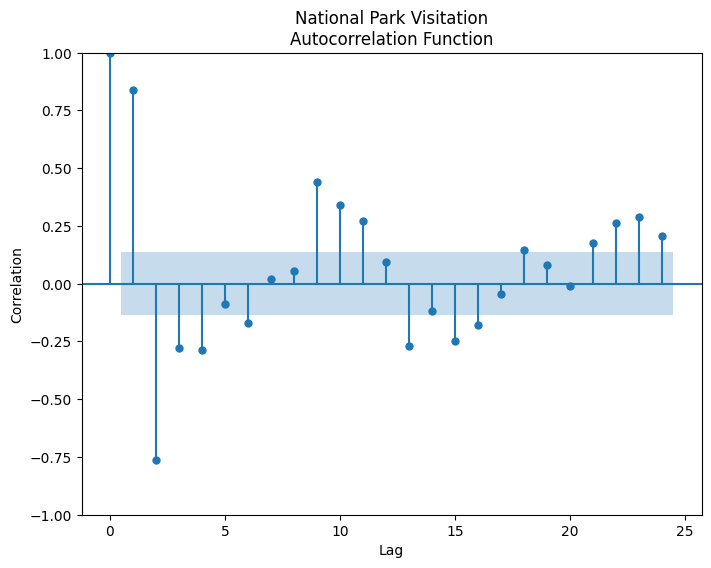

In [195]:
#ts_split = TimeSeriesSplit()
#X = park_df[['Month', 'Year', 'Google_Searches']]
#y = park_df['RecreationVisits']
#for train_ind, test_ind in ts_split.split(X):
#    X_train, X_test = X.iloc[train_ind], X.iloc[test_ind]
#    y_train, y_test = y.iloc[train_ind], y.iloc[test_ind]
#X_train


from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

plot_pacf(final_park['RecreationVisits'], ax, lags=24, title="National Park Visitation\nAutocorrelation Function")
ax.set_xlabel("Lag")
ax.set_ylabel("Correlation")


In [196]:
# train-test split
from sklearn.model_selection import train_test_split
#train, test = train_test_split(final_park, test_size=0.2)

#X_train, y_train = train.drop('RecreationVisits', axis = 1), train['RecreationVisits']
#X_test, y_test = test.drop('RecreationVisits', axis = 1), test['RecreationVisits']

train, test = train_test_split(gt_season, test_size=0.2)

X_train, y_train = train.drop('RecreationVisits', axis = 1), train['RecreationVisits']
X_test, y_test = test.drop('RecreationVisits', axis = 1), test['RecreationVisits']
X_test.head()

,NonRecreationVisits_lag,ConcessionerLodging_lag,ConcessionerCamping_lag,TentCampers_lag,RVCampers_lag,Backcountry_lag,season,RecreationVisits_lag,Google_Searches_lag,NonRecreationOvernightStays_lag,MiscellaneousOvernightStays_lag
date,,,,,,,,,,,
2015-01-01,4633.0,27936.0,0.0,3423.0,2312.0,0.0,1,112133.0,32.0,0.0,0.0
2014-12-01,5325.0,39638.0,0.0,2374.0,2072.0,373.0,1,131479.0,34.0,0.0,150.0
2016-07-01,22714.0,109117.0,0.0,121937.0,52660.0,61924.0,3,626009.0,46.0,0.0,12924.0
2014-11-01,6326.0,36037.0,0.0,4737.0,6588.0,687.0,4,161356.0,37.0,0.0,240.0
2012-03-01,4032.0,35000.0,0.0,1799.0,2728.0,750.0,2,100433.0,32.0,0.0,70.0


### Testing XGBoost

In [197]:

import xgboost as xgb
from sklearn.metrics import mean_absolute_error
model = xgb.XGBRegressor(n_estimators=1000)
model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50, #stop if 50 consequent rounds without decrease of error
        verbose=False) 

preds = pd.DataFrame(columns = ['Date', 'Preds'])
preds['Date'] = X_test.index
preds['Preds'] = model.predict(X_test)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, preds['Preds'])

preds

/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


,Date,Preds
0,2015-01-01,142507.234375
1,2014-12-01,124986.054688
2,2016-07-01,609084.437500
3,2014-11-01,150729.890625
4,2012-03-01,146463.671875
5,2008-08-01,628911.812500
6,2012-09-01,504290.750000
7,2018-01-01,127728.039062
8,2013-10-01,295780.156250
9,2005-12-01,195686.937500


#### Testing different algorithms

In [198]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

LR: 0.695767 (0.164149)
KNN: 0.673951 (0.066813)
RF: 0.755207 (0.110913)
SVR: -0.241149 (0.213372)


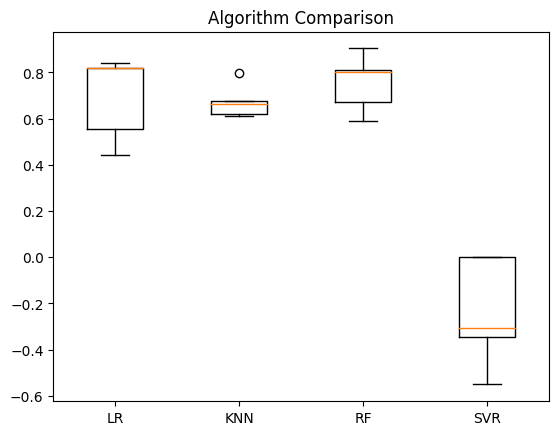

In [199]:
# evaluate models 
models = []
models.append(('LR', LinearRegression()))
#models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor())) 
models.append(('SVR', SVR(gamma='auto'))) 
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit()
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [200]:
from sklearn.model_selection import GridSearchCV
# use grid search cv to get optimal hyperparameters
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit()
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model

RandomForestRegressor(max_depth=6, max_features='sqrt', n_estimators=20)

In [201]:
from sklearn import metrics
rf_model = RandomForestRegressor(max_depth = 6, max_features = 'sqrt', n_estimators = 20, random_state = 42)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

#y_true = list(y_test.values)

def regression_results(y_true, y_pred):
    # regression metrics dict
    reg_results = {}
    
    # regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    
    # add regression metrics to dict
    reg_results['explained_variance'] = round(explained_variance,4)
    reg_results['mean_sq_log_error'] = round(mean_squared_log_error, 4)
    reg_results['r2'] = round(r2, 4)
    reg_results['MAE'] = round(mean_absolute_error,4)
    reg_results['MSE'] = round(mse, 4)
    reg_results['RMSE'] = round(np.sqrt(mse), 4)
    return reg_results

regression_results(y_test, preds)

{'explained_variance': 0.9052,
 'mean_sq_log_error': 0.0299,
 'r2': 0.9052,
 'MAE': 38749.4475,
 'MSE': 3208329785.548,
 'RMSE': 56642.1202}

In [202]:
import statsmodels.api as sm

# train Ordinary Least Squares model
#X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:       RecreationVisits   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              291.6
Date:                Mon, 17 Oct 2022   Prob (F-statistic):                    5.72e-92
Time:                        11:41:52   Log-Likelihood:                         -2082.4
No. Observations:                 163   AIC:                                      4183.
Df Residuals:                     154   BIC:                                      4211.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

/Users/lindseyching/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
